In [1]:
import random
import json
import math
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# 10個のランダムな点を生成し、IDと座標を付与
points = {}
for i in range(20):
    x = random.uniform(0, 1)  # x座標を0から1の範囲でランダムに生成
    y = random.uniform(0, 1)  # y座標を0から1の範囲でランダムに生成
    points[i] = {'x': x, 'y': y}

# 座標データをリストに変換
coordinates = [(point['x'], point['y']) for point in points.values()]

# ドロネー図を作成
tri = Delaunay(coordinates)

# 各点の近接点の座標と距離を取得
neighbors = {}
for i in range(20):
    neighbor_indices = tri.vertex_neighbor_vertices[1][tri.vertex_neighbor_vertices[0][i]:tri.vertex_neighbor_vertices[0][i+1]]
    neighbor_points = []
    distances = []
    for j in neighbor_indices:
        neighbor_points.append(coordinates[j])
        distance = math.sqrt((coordinates[j][0] - coordinates[i][0])**2 + (coordinates[j][1] - coordinates[i][1])**2)
        distances.append(distance)
    neighbors[i] = {'points': neighbor_points, 'distances': distances}

# 各点の近接点の座標と距離をJSONに追加
for i, data in neighbors.items():
    neighbor_points = data['points']
    distances = data['distances']
    points[i]['neighbors'] = [{'x': x, 'y': y, 'distance': d} for (x, y), d in zip(neighbor_points, distances)]

# JSON形式のデータを作成
json_data = json.dumps(points)

# JSONデータを表示
print(json_data)

{"0": {"x": 0.06046814080439267, "y": 0.5127460476707754, "neighbors": [{"x": 0.08753923544154263, "y": 0.500955910172545, "distance": 0.029527131711033265}, {"x": 0.18636285142011821, "y": 0.6959822523642509, "distance": 0.2223173067295629}, {"x": 0.024695497541187383, "y": 0.47950874974871205, "distance": 0.048830318237715185}, {"x": 0.0242232788729827, "y": 0.8661959435195911, "distance": 0.3553034180696347}]}, "1": {"x": 0.9381907611282628, "y": 0.14486296505788487, "neighbors": [{"x": 0.9015224865638853, "y": 0.4638371020165537, "distance": 0.32107485483615217}, {"x": 0.9539142937878485, "y": 0.13491667973556543, "distance": 0.018605323727633592}, {"x": 0.7167656827182959, "y": 0.11428161010120996, "distance": 0.22352692146550526}, {"x": 0.7209786829175043, "y": 0.20152885221548245, "distance": 0.2244818693970501}, {"x": 0.8391648512825358, "y": 0.3556106220840861, "distance": 0.23285339972353294}]}, "2": {"x": 0.7201763403837066, "y": 0.8839934745054117, "neighbors": [{"x": 0.901

In [2]:
import cv2
import json
import numpy as np

def draw_lines_with_random_colors(json_data):
    # Parse JSON data
    points = json.loads(json_data)

    # Create an image canvas with cyan background
    canvas_size = 500
    canvas = np.zeros((canvas_size, canvas_size, 3), dtype=np.uint8)
    canvas[:, :] = (255, 255, 0)  # Fill with cyan color

    # Draw lines between neighbors with random colors
    for i, point_data in points.items():
        x1 = int(point_data['x'] * canvas_size)
        y1 = int(point_data['y'] * canvas_size)
        for neighbor in point_data['neighbors']:
            x2 = int(neighbor['x'] * canvas_size)
            y2 = int(neighbor['y'] * canvas_size)
            color = tuple(np.random.randint(0, 256, 3).tolist())
            cv2.line(canvas, (x1, y1), (x2, y2), color, 2)

    # Draw text on top of lines
    for i, point_data in points.items():
        x1 = int(point_data['x'] * canvas_size)
        y1 = int(point_data['y'] * canvas_size)

        # Show the topmost key on the point
        cv2.putText(canvas, str(i), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

        for neighbor in point_data['neighbors']:
            x2 = int(neighbor['x'] * canvas_size)
            y2 = int(neighbor['y'] * canvas_size)

            # Calculate middle point of the line
            mid_x = (x1 + x2) // 2
            mid_y = (y1 + y2) // 2

            # Draw the distance on the middle of the line
            distance = neighbor['distance']
            distance_str = "{:.2f}".format(distance)
            cv2.putText(canvas, distance_str, (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    # Show the canvas
    cv2.imshow('Points with Neighbors', canvas)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
draw_lines_with_random_colors(json_data)



In [3]:
json_data

'{"0": {"x": 0.06046814080439267, "y": 0.5127460476707754, "neighbors": [{"x": 0.08753923544154263, "y": 0.500955910172545, "distance": 0.029527131711033265}, {"x": 0.18636285142011821, "y": 0.6959822523642509, "distance": 0.2223173067295629}, {"x": 0.024695497541187383, "y": 0.47950874974871205, "distance": 0.048830318237715185}, {"x": 0.0242232788729827, "y": 0.8661959435195911, "distance": 0.3553034180696347}]}, "1": {"x": 0.9381907611282628, "y": 0.14486296505788487, "neighbors": [{"x": 0.9015224865638853, "y": 0.4638371020165537, "distance": 0.32107485483615217}, {"x": 0.9539142937878485, "y": 0.13491667973556543, "distance": 0.018605323727633592}, {"x": 0.7167656827182959, "y": 0.11428161010120996, "distance": 0.22352692146550526}, {"x": 0.7209786829175043, "y": 0.20152885221548245, "distance": 0.2244818693970501}, {"x": 0.8391648512825358, "y": 0.3556106220840861, "distance": 0.23285339972353294}]}, "2": {"x": 0.7201763403837066, "y": 0.8839934745054117, "neighbors": [{"x": 0.90

In [4]:
import json
import pandas as pd

def create_neighbor_dataframe(json_str):
    # Parse the JSON string into a Python object
    json_data = json.loads(json_str)
    

    
    # Create lists to store x, y, and distance values
    x_values = []
    y_values = []
    distance_values = []


    for i, point_data in json_data.items():
    # Iterate over each neighbor
        for neighbor in point_data["neighbors"]:
            x = neighbor['x']
            y = neighbor['y']
            distance = neighbor['distance']
            
            # Append values to respective lists
            x_values.append(x)
            y_values.append(y)
            distance_values.append(distance)
    
    # Create pandas DataFrame
    neighbor_df = pd.DataFrame({
        'x_neighbor': x_values,
        'y_neighbor': y_values,
        'distance': distance_values
    })
    
    return neighbor_df


create_neighbor_dataframe(json_data)

,x_neighbor,y_neighbor,distance
0,0.087539,0.500956,0.029527
1,0.186363,0.695982,0.222317
2,0.024695,0.479509,0.048830
3,0.024223,0.866196,0.355303
4,0.901522,0.463837,0.321075
...,...,...,...
95,0.720176,0.883993,0.457622
96,0.710482,0.927435,0.501418
97,0.532539,0.672499,0.423897
98,0.813837,0.393146,0.112632


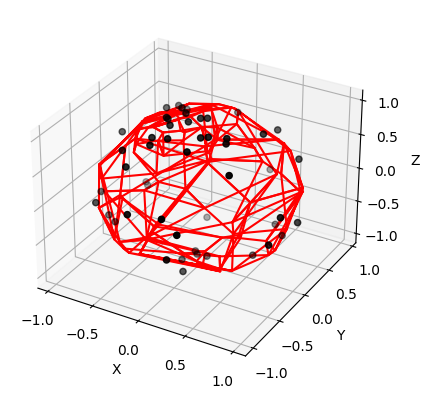

In [5]:
import numpy as np
from scipy.spatial import SphericalVoronoi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Spherical coordinates of points on the unit sphere
np.random.seed(0)
n_points = 50
theta = np.random.uniform(0, 2 * np.pi, n_points)
phi = np.random.uniform(0, np.pi, n_points)

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
points = np.column_stack([x, y, z])

# Compute the Spherical Voronoi diagram
sv = SphericalVoronoi(points)

# Plot the Voronoi diagram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='k')
for region in sv.regions:
    if len(region) > 0:
        vertices = sv.vertices[region + [region[0]]]
        ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], 'r-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


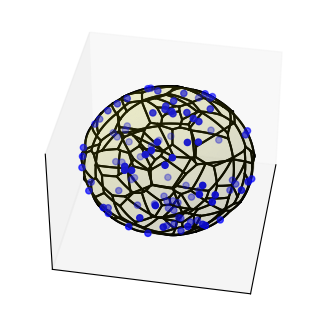

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi, geometric_slerp
from mpl_toolkits.mplot3d import proj3d
# set input data
# Spherical coordinates of points on the unit sphere
np.random.seed(0)
n_points = 100
theta = np.random.uniform(0, 2 * np.pi, n_points)
phi = np.random.uniform(0, np.pi, n_points)

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
points = np.column_stack([x, y, z])


radius = 1
center = np.array([0, 0, 0])
sv = SphericalVoronoi(points, radius, center)

# sort vertices (optional, helpful for plotting)
sv.sort_vertices_of_regions()
t_vals = np.linspace(0, 1, 2000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot the unit sphere for reference (optional)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='y', alpha=0.1)
# plot generator points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')
# plot Voronoi vertices
# ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')
# indicate Voronoi regions (as Euclidean polygons)
for region in sv.regions:
   n = len(region)
   for i in range(n):
       start = sv.vertices[region][i]
       end = sv.vertices[region][(i + 1) % n]
       result = geometric_slerp(start, end, t_vals)
       ax.plot(result[..., 0],
               result[..., 1],
               result[..., 2],
               c='k')
ax.azim = 10
ax.elev = 40
_ = ax.set_xticks([])
_ = ax.set_yticks([])
_ = ax.set_zticks([])
fig.set_size_inches(4, 4)
plt.show()


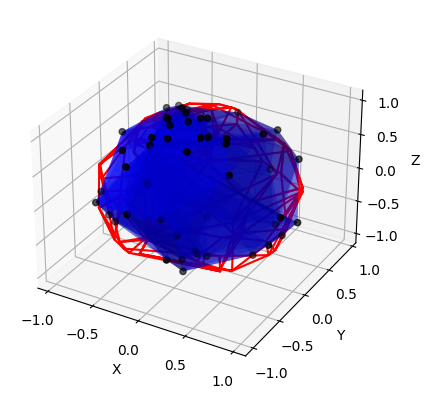

In [9]:

"""ArithmeticError
https://www.redblobgames.com/x/1842-delaunay-voronoi-sphere/
"""

import numpy as np
from scipy.spatial import SphericalVoronoi, Delaunay
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Spherical coordinates of points on the unit sphere
np.random.seed(0)
n_points = 50
theta = np.random.uniform(0, 2 * np.pi, n_points)
phi = np.random.uniform(0, np.pi, n_points)

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)
points = np.column_stack([x, y, z])

# Compute the Spherical Voronoi diagram
sv = SphericalVoronoi(points)

# Compute the Delaunay triangulation for spherical coordinates
tri = Delaunay(points)

# Plot the Voronoi diagram and Delaunay triangulation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='k')

for region in sv.regions:
    if len(region) > 0:
        vertices = sv.vertices[region + [region[0]]]
        ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], 'r-')

for simplex in tri.simplices:
    ax.plot_trisurf(points[simplex, 0], points[simplex, 1], points[simplex, 2], color='b', alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
